<a href="https://colab.research.google.com/github/mahdieslaminet/MNIST_ONNX_Classification/blob/main/ONNX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch onnx onnxruntime


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
pip install torch torchvision onnx onnxruntime


In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# آموزش و تبدیل مدل به ONNX
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import onnx
import onnxruntime as ort
import numpy as np

# تعریف مدل ساده
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# آماده‌سازی داده‌ها
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# ساخت مدل، تعریف تابع هزینه و بهینه‌ساز
model = SimpleModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# آموزش مدل
for epoch in range(5):  # آموزش برای 5 دور
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# تبدیل مدل به فرمت ONNX
dummy_input = torch.randn(1, 1, 28, 28)  # ورودی نمونه برای مدل
onnx_model_path = "/content/drive/My Drive/simple_model.onnx"
torch.onnx.export(model, dummy_input, onnx_model_path, input_names=['input'], output_names=['output'])
print(f"Model saved to {onnx_model_path}")


Mounted at /content/drive
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 968941.41it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 152313.89it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1445960.74it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4477210.05it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 0.3986712098121643
Epoch 2, Loss: 0.30953291058540344
Epoch 3, Loss: 0.4542768895626068
Epoch 4, Loss: 0.19958028197288513
Epoch 5, Loss: 0.16435885429382324
Model saved to /content/drive/My Drive/simple_model.onnx


Mounted at /content/drive


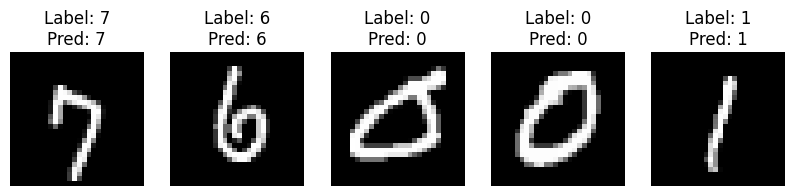

In [ ]:
import requests
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
from google.colab import drive

# اتصال به گوگل درایو
drive.mount('/content/drive', force_remount=True)

# مسیر مدل ONNX در گوگل درایو
onnx_model_path = "/content/drive/My Drive/simple_model.onnx"

# بارگذاری مدل ONNX
ort_session = ort.InferenceSession(onnx_model_path)

# آماده‌سازی داده‌ها (دیتاست MNIST)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)

# انتخاب چند تصویر از دیتاست
images, labels = [], []
for i, (img, lbl) in enumerate(test_loader):
    if i >= 5:
        break
    images.append(img)
    labels.append(lbl)

images = torch.cat(images)
labels = torch.cat(labels)

# نمایش تصاویر و انجام کلاس‌بندی
plt.figure(figsize=(10, 5))

for i in range(5):
    image = images[i].numpy().squeeze()
    label = labels[i].item()

    # آماده‌سازی ورودی برای مدل ONNX
    ort_inputs = {ort_session.get_inputs()[0].name: images[i].numpy().reshape(1, 1, 28, 28).astype(np.float32)}
    ort_outs = ort_session.run(None, ort_inputs)
    pred_label = np.argmax(ort_outs[0])

    # نمایش تصویر
    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}\nPred: {pred_label}')
    plt.axis('off')

    # نمایش نتیجه درستی یا نادرستی
    if label == pred_label:
        plt.xlabel('Correct', color='green')
    else:
        plt.xlabel('Wrong', color='red')

plt.show()
